In [3]:
from adtk.detector import SeasonalAD
from adtk.data import validate_series
from adtk.visualization import plot
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore", message="Setting an item of incompatible dtype")

<h1 style="text-align: center;">Anomaly Detection Toolkit (movement outliers)</h1>


### What's an outlier ?

An outlier is a observation or data point whose value is significantly diferent from others.
They can occur due to various reasons, such as measurements errors, exeperimental errors, or natural 
variablility in data.

In a typical time series, data are collected or recorded over sucessive time intervals with each data representing a observation taken in a specific time. In a time series each data point that is collected is typically related to the previous one in some way, refleting the evolution of the phenomenon being measured.

However, when detection outliers in a time series we treat each point of data time series is treated independently of the time.

There are various types of anomalys, outliers are the most basic ones where the value of a specific point is significantly different from others. 
Spikes are abrut and temporary increases or decreases in a value of a data point when compared to its neighboring points, they are sudden, shor-term fluctuations in the data being measured.
In the other hand level shifts in comparison with spikes are a more permanent change in the values of a data point compared with the previous levels unlike spikes they represent a more sustained change in the data being mesured.

### Univariate vs Multivariate Anomaly Detection

Univariate anomaly detection involves analyzing a single variable or dimensions of a time series, its used for example when detecting a anomalys in the temperature and only that variable. 

Multivariate anomaly detection involves analyzing multiple variables or dimensions of data in a time series simultaneously, where in many cases the anomaly detection can be separated across series. Meaning that you can independently detect anomalies in each time series (temperature and humidity) and then aggregate the results.

Thre is also intrinsic multivariate algorithms were anomalys cannot be detected by analyzing individual dimensions seperatly, in this cases the variables are have relationships that affect each other. Its used when for example when detection anomalies in the heat index, that is based in both temperature and humidity.

In [13]:
# Load the dataset
sleeping_data = pd.read_csv("Data/normal_data_accelerometer.csv")

# convert to pandas date time 
sleeping_data['date'] = pd.to_datetime(sleeping_data['date'])
# Convert the 'date' column to datetime and set it as the index
sleeping_data = sleeping_data.set_index("date")

# get each axix data
x_axis_data = sleeping_data["x"]
y_axis_data = sleeping_data["y"]
z_axis_data = sleeping_data["z"]

# validating series
x_train = validate_series(x_axis_data)
y_train = validate_series(y_axis_data)
z_train = validate_series(z_axis_data)

### Level Shift Anomaly Detection

Detects shift of value level by tracking the difference between median values at two sliding time windows next to each other. It is not sensitive to instantaneous spikes and could be a good choice if noisy outliers happen frequently.

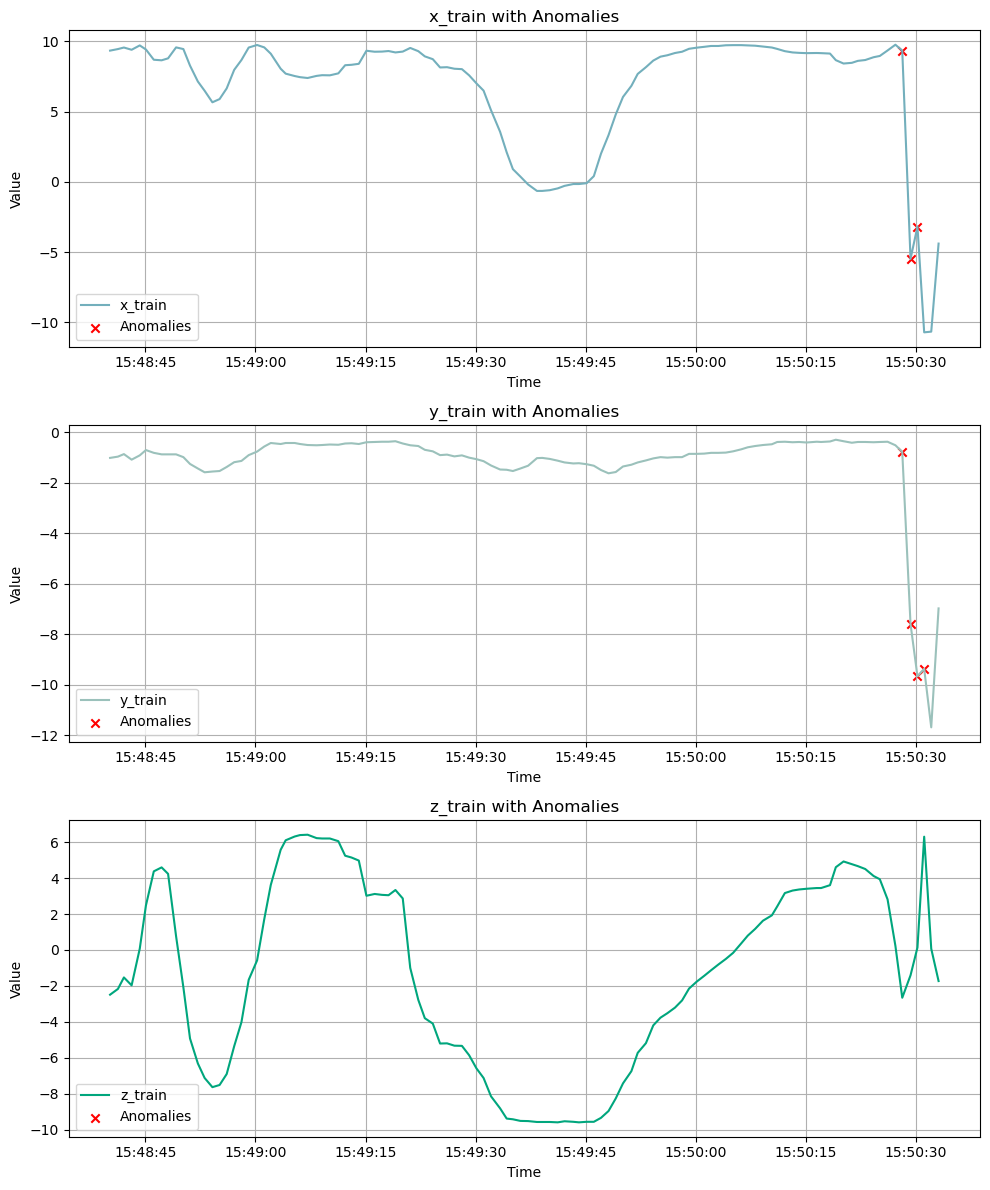

In [17]:
import matplotlib.pyplot as plt
from adtk.detector import LevelShiftAD

# Assuming x_train, y_train, z_train are defined and contain the time series data

# Create and fit the LevelShiftAD detector for x_train
level_shift_ad_x = LevelShiftAD(c=6.0, side='both', window=3)
anomalies_x = level_shift_ad_x.fit_detect(x_train)

# Create and fit the LevelShiftAD detector for y_train
level_shift_ad_y = LevelShiftAD(c=6.0, side='both', window=3)
anomalies_y = level_shift_ad_y.fit_detect(y_train)

# Create and fit the LevelShiftAD detector for z_train
level_shift_ad_z = LevelShiftAD(c=6.0, side='both', window=3)
anomalies_z = level_shift_ad_z.fit_detect(z_train)

# Filter out NaN values from anomalies
non_nan_anomalies_x = anomalies_x.dropna()
non_nan_anomalies_y = anomalies_y.dropna()
non_nan_anomalies_z = anomalies_z.dropna()

# Append the dates of the anomalies
anomalies_x_dates = [anomaly_idx for anomaly_idx, anomaly in non_nan_anomalies_x.items() if anomaly]
anomalies_y_dates = [anomaly_idx for anomaly_idx, anomaly in non_nan_anomalies_y.items() if anomaly]
anomalies_z_dates = [anomaly_idx for anomaly_idx, anomaly in non_nan_anomalies_z.items() if anomaly]

# Create a figure with three subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 12))


# Plot x_train with detected anomalies
axs[0].plot(x_train, label='x_train', color='#73afbc')
axs[0].scatter(anomalies_x_dates, x_train.loc[anomalies_x_dates], color='red', marker='x', label='Anomalies')
axs[0].set_title('x_train with Anomalies')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Value')
axs[0].legend()
axs[0].grid()

# Plot y_train with detected anomalies
axs[1].plot(y_train, label='y_train', color='#9bc1bb')
axs[1].scatter(anomalies_y_dates, y_train.loc[anomalies_y_dates], color='red', marker='x', label='Anomalies')
axs[1].set_title('y_train with Anomalies')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Value')
axs[1].legend()
axs[1].grid()

# Plot z_train with detected anomalies
axs[2].plot(z_train, label='z_train', color='#00a67d')
axs[2].scatter(anomalies_z_dates, z_train.loc[anomalies_z_dates], color='red', marker='x', label='Anomalies')
axs[2].set_title('z_train with Anomalies')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('Value')
axs[2].legend()
axs[2].grid()

plt.tight_layout()

plt.savefig("Images/LevelShiftAD_graph")
plt.show()


In this data of the accelerator, it has proven to detect the transition between the state of sleeping and the state of walking. Two of the axis identified anomalies in the same timestamps.

### Quantile

In the following example, we detect time points when temperature is above 99% percentile or below 1% percentile.

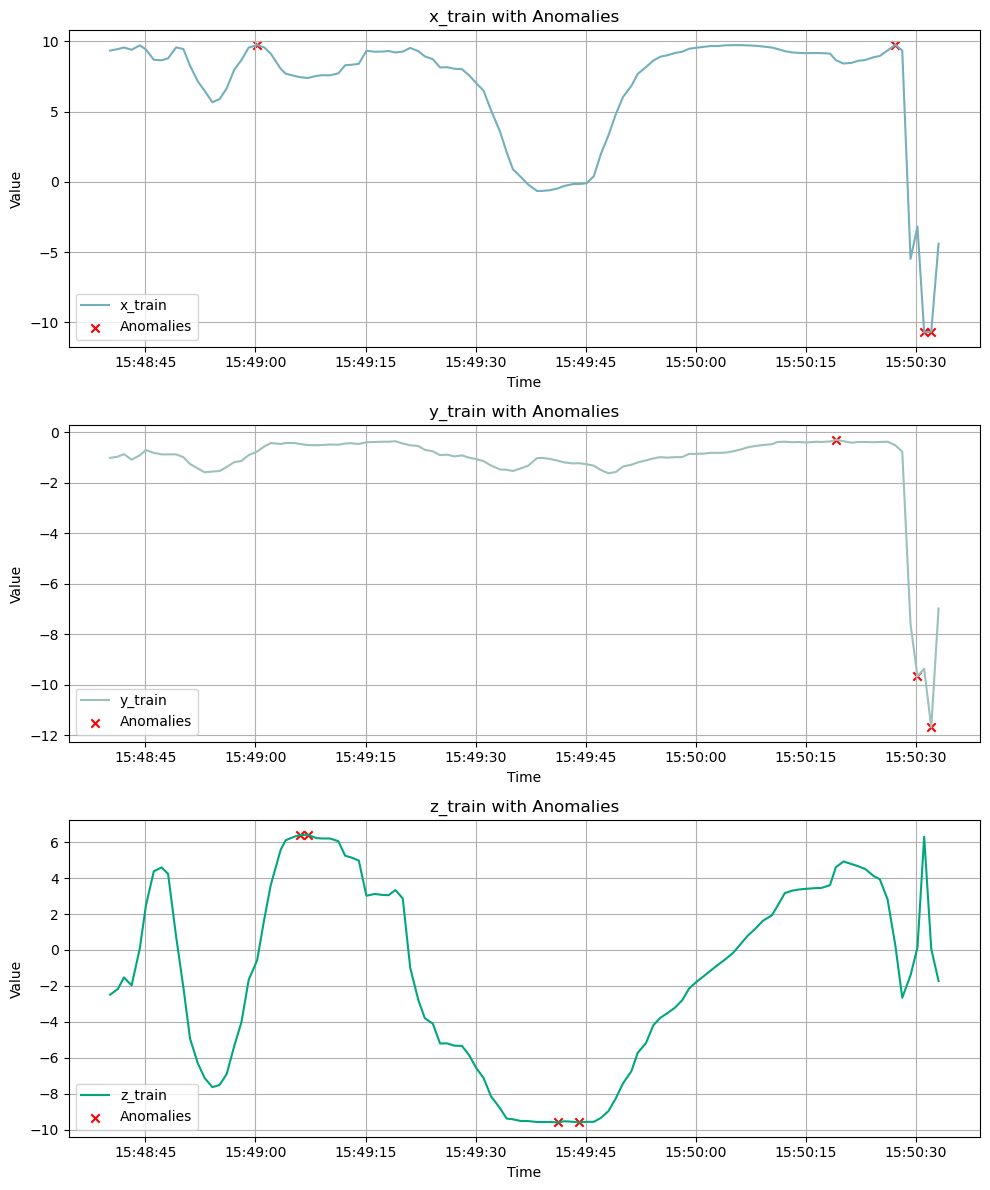

In [26]:
import matplotlib.pyplot as plt
from adtk.detector import QuantileAD

# Assuming x_train, y_train, z_train are defined and contain the time series data

# Create and fit the QuantileAD detector for x_train
quantile_ad_x = QuantileAD(high=0.99, low=0.01)
anomalies_x = quantile_ad_x.fit_detect(x_train)

# Create and fit the QuantileAD detector for y_train
quantile_ad_y = QuantileAD(high=0.99, low=0.01)
anomalies_y = quantile_ad_y.fit_detect(y_train)

# Create and fit the QuantileAD detector for z_train
quantile_ad_z = QuantileAD(high=0.99, low=0.01)
anomalies_z = quantile_ad_z.fit_detect(z_train)

# Filter out NaN values from anomalies
non_nan_anomalies_x = anomalies_x.dropna()
non_nan_anomalies_y = anomalies_y.dropna()
non_nan_anomalies_z = anomalies_z.dropna()

# Append the dates of the anomalies
anomalies_x_dates = [anomaly_idx for anomaly_idx, anomaly in non_nan_anomalies_x.items() if anomaly]
anomalies_y_dates = [anomaly_idx for anomaly_idx, anomaly in non_nan_anomalies_y.items() if anomaly]
anomalies_z_dates = [anomaly_idx for anomaly_idx, anomaly in non_nan_anomalies_z.items() if anomaly]

# Create a figure with three subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# Plot x_train with detected anomalies
axs[0].plot(x_train, label='x_train', color='#73afbc')
axs[0].scatter(anomalies_x_dates, x_train.loc[anomalies_x_dates], color='red', marker='x', label='Anomalies')
axs[0].set_title('x_train with Anomalies')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Value')
axs[0].legend()
axs[0].grid()

# Plot y_train with detected anomalies
axs[1].plot(y_train, label='y_train', color='#9bc1bb')
axs[1].scatter(anomalies_y_dates, y_train.loc[anomalies_y_dates], color='red', marker='x', label='Anomalies')
axs[1].set_title('y_train with Anomalies')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Value')
axs[1].legend()
axs[1].grid()

# Plot z_train with detected anomalies
axs[2].plot(z_train, label='z_train', color='#00a67d')
axs[2].scatter(anomalies_z_dates, z_train.loc[anomalies_z_dates], color='red', marker='x', label='Anomalies')
axs[2].set_title('z_train with Anomalies')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('Value')
axs[2].legend()
axs[2].grid()

plt.tight_layout()
plt.savefig("Images/QuantileAD_graph")
plt.show()


In this data of the accelerator, it has proven to detect the transition between the state of sleeping and the state of walking. Two of the axis identified anomalies in the same timestamps.


### OutLier Detector

Performs multivariate time-independent outlier detection and identifies outliers as anomalies. The multivariate outlier detection algorithm could be those in scikit-learn or other packages following same API.

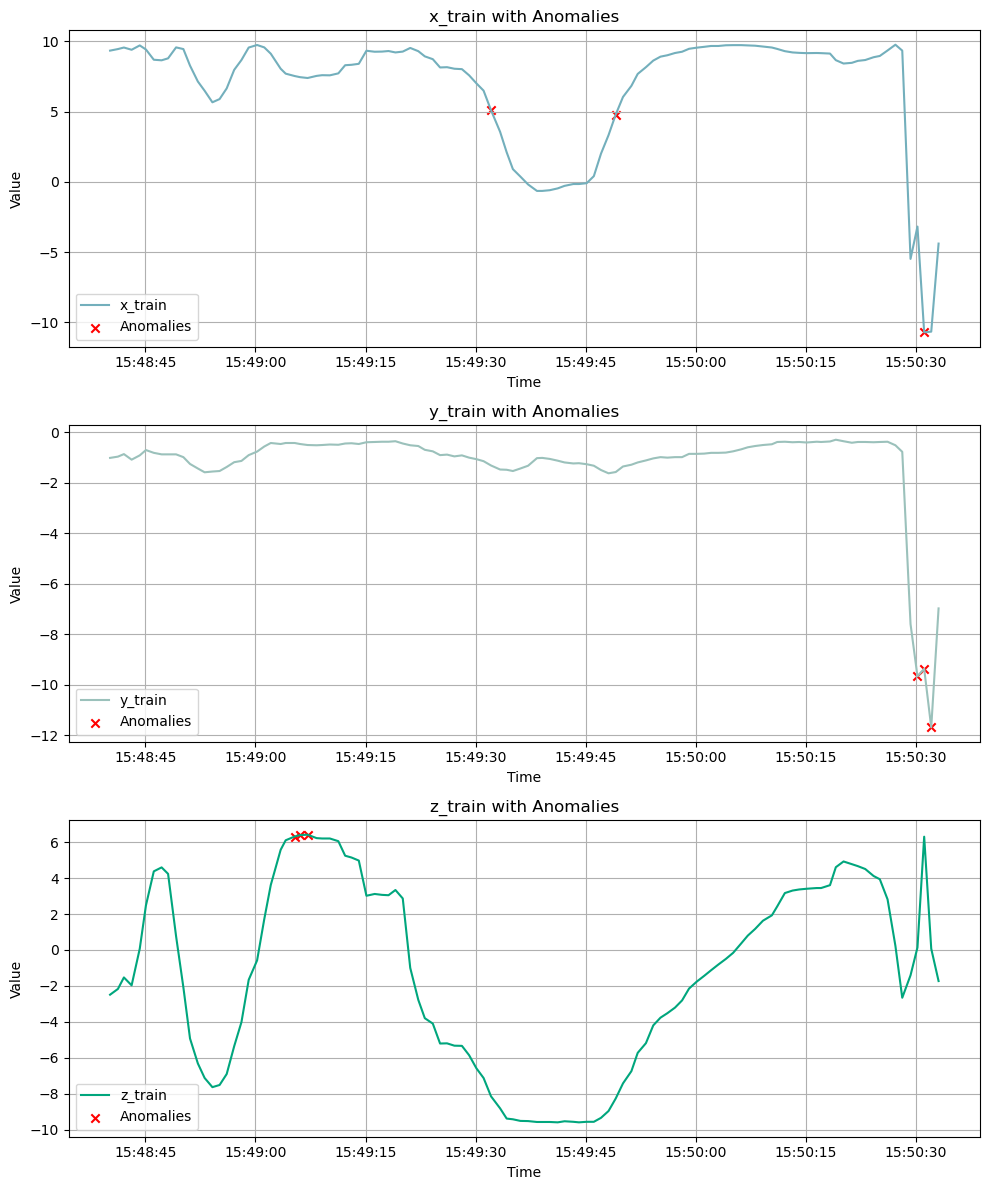

In [29]:
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from adtk.detector import OutlierDetector
import pandas as pd

# Assuming x_train, y_train, z_train are defined and contain the time series data

# Convert time series to DataFrame
x_train_df = pd.DataFrame(x_train)
y_train_df = pd.DataFrame(y_train)
z_train_df = pd.DataFrame(z_train)

# Create and fit the OutlierDetector using LocalOutlierFactor for x_train
outlier_detector_x = OutlierDetector(LocalOutlierFactor(contamination=0.02))
anomalies_x = outlier_detector_x.fit_detect(x_train_df)

# Create and fit the OutlierDetector using LocalOutlierFactor for y_train
outlier_detector_y = OutlierDetector(LocalOutlierFactor(contamination=0.02))
anomalies_y = outlier_detector_y.fit_detect(y_train_df)

# Create and fit the OutlierDetector using LocalOutlierFactor for z_train
outlier_detector_z = OutlierDetector(LocalOutlierFactor(contamination=0.02))
anomalies_z = outlier_detector_z.fit_detect(z_train_df)

# Filter out NaN values from anomalies
non_nan_anomalies_x = anomalies_x.dropna()
non_nan_anomalies_y = anomalies_y.dropna()
non_nan_anomalies_z = anomalies_z.dropna()

# Append the dates of the anomalies
anomalies_x_dates = [anomaly_idx for anomaly_idx, anomaly in non_nan_anomalies_x.items() if anomaly]
anomalies_y_dates = [anomaly_idx for anomaly_idx, anomaly in non_nan_anomalies_y.items() if anomaly]
anomalies_z_dates = [anomaly_idx for anomaly_idx, anomaly in non_nan_anomalies_z.items() if anomaly]

# Create a figure with three subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# Plot x_train with detected anomalies
axs[0].plot(x_train, label='x_train', color='#73afbc')
axs[0].scatter(anomalies_x_dates, x_train.loc[anomalies_x_dates], color='red', marker='x', label='Anomalies')
axs[0].set_title('x_train with Anomalies')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Value')
axs[0].legend()
axs[0].grid()

# Plot y_train with detected anomalies
axs[1].plot(y_train, label='y_train', color='#9bc1bb')
axs[1].scatter(anomalies_y_dates, y_train.loc[anomalies_y_dates], color='red', marker='x', label='Anomalies')
axs[1].set_title('y_train with Anomalies')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Value')
axs[1].legend()
axs[1].grid()

# Plot z_train with detected anomalies
axs[2].plot(z_train, label='z_train', color='#00a67d')
axs[2].scatter(anomalies_z_dates, z_train.loc[anomalies_z_dates], color='red', marker='x', label='Anomalies')
axs[2].set_title('z_train with Anomalies')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('Value')
axs[2].legend()
axs[2].grid()

plt.tight_layout()
plt.savefig("Images/LocalOutlierFactor_graph")
plt.show()


In this data of the accelerator, it has proven to detect the transition between the state of sleeping and the state of walking. Two of the axis identified anomalies in the same timestamps.
